In [37]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%autoreload

In [39]:
from community import community_louvain

In [40]:
import pandas as pd

from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs import KG
from pyrdf2vec.walkers import RandomWalker

In [30]:
data = pd.read_csv("./entities.tsv", sep="\t")
entities = [entity for entity in data["location"]]
print(entities)

['http://dbpedia.org/resource/Belgium', 'http://dbpedia.org/resource/France', 'http://dbpedia.org/resource/Germany', 'http://dbpedia.org/resource/Australia', 'http://dbpedia.org/resource/New_Zealand', 'http://dbpedia.org/resource/Peru', 'http://dbpedia.org/resource/Sri_Lanka', 'http://dbpedia.org/resource/Cyprus', 'http://dbpedia.org/resource/Spain', 'http://dbpedia.org/resource/Portugal', 'http://dbpedia.org/resource/Russia', 'http://dbpedia.org/resource/Brussels', 'http://dbpedia.org/resource/Paris', 'http://dbpedia.org/resource/Berlin', 'http://dbpedia.org/resource/Canberra', 'http://dbpedia.org/resource/Wellington', 'http://dbpedia.org/resource/Lima', 'http://dbpedia.org/resource/Nicosia', 'http://dbpedia.org/resource/Colombo', 'http://dbpedia.org/resource/Madrid', 'http://dbpedia.org/resource/Lisbon', 'http://dbpedia.org/resource/Moscow']


In [41]:
knowledge_graph = KG(
    "https://dbpedia.org/sparql",
    skip_predicates={"www.w3.org/1999/02/22-rdf-syntax-ns#type"},
    literals=[
        [
            "http://dbpedia.org/ontology/wikiPageWikiLink",
            "http://www.w3.org/2004/02/skos/core#prefLabel",
        ],
        ["http://dbpedia.org/ontology/humanDevelopmentIndex"],
    ],
)

In [76]:
transformer = RDF2VecTransformer(
    Word2Vec(epochs=10),
    walkers=[RandomWalker(4, 10, with_reverse=False, n_jobs=2)],
    # verbose=1
)

In [65]:
knowledge_graph.cache

TTLCache({}, maxsize=1024, currsize=0)

##### To make the cell below work, I changed Line 123 in `/home/aakash/miniconda3/envs/gsoc/lib/python3.11/site-packages/pyrdf2vec/connectors.py`

In [43]:
embeddings, literals = transformer.fit_transform(knowledge_graph, entities)
print(embeddings)

[array([ 9.04134661e-03, -9.02989972e-03, -5.72313182e-03,  3.49621708e-03,
        5.96528081e-03, -6.97906362e-03,  3.71509604e-03,  1.10435430e-02,
       -7.75336055e-03, -6.99156430e-03, -4.77639493e-03, -5.37182996e-03,
        2.00438057e-03,  1.05790431e-02,  6.25649048e-03, -2.58493499e-04,
        3.38458689e-03,  7.96812680e-03,  8.95460416e-03,  3.67667223e-03,
        6.57351222e-03, -6.68994058e-03, -2.69568944e-03, -6.20119693e-03,
        6.54582586e-03, -2.25308351e-03, -1.03536267e-02,  7.28259841e-03,
        7.34473485e-03, -3.12757818e-03,  1.02223661e-02, -2.90439464e-04,
       -2.73296656e-03, -9.63138358e-04, -6.08816510e-04, -2.15392327e-03,
        3.27675370e-03,  5.13617741e-03,  5.79461874e-03, -1.02856597e-02,
       -2.00797804e-03, -5.69728808e-03,  7.05613522e-03,  6.53916551e-03,
       -3.62698501e-03,  1.71466114e-03, -6.98040705e-03,  6.41156585e-05,
        1.03051756e-02, -1.73266314e-03, -4.96527506e-03, -8.47315509e-03,
       -3.66575248e-03, 

In [66]:
ontologies = ['team', 'height', 'number', 'position', 'birthPlace', 'birthDate']
ontologies = ['https://dbpedia.org/ontology/'+o for o in ontologies]
ontologies

['https://dbpedia.org/ontology/team',
 'https://dbpedia.org/ontology/height',
 'https://dbpedia.org/ontology/number',
 'https://dbpedia.org/ontology/position',
 'https://dbpedia.org/ontology/birthPlace',
 'https://dbpedia.org/ontology/birthDate']

In [73]:
for o in ontologies:
    print(knowledge_graph.is_exist(o))

False
False
False
False
False
False


In [74]:
knowledge_graph.is_exist('http://dbpedia.org/resource/Belgium')

False

In [79]:
transformer.walkers

[RandomWalker(max_depth=4, max_walks=10, sampler=UniformSampler(inverse=False, split=False), n_jobs=2, with_reverse=False, random_state=None)]

In [77]:
ontology_embeddings = transformer.fit_transform(knowledge_graph, entities=ontologies)
len(ontology_embeddings)

ValueError: At least one provided entity does not exist in the Knowledge Graph.

In [47]:
len(embeddings)

22

In [49]:
embeddings[0].shape

(100,)

In [50]:
from sklearn.manifold import TSNE

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [54]:
import numpy as np
embeddings_arr = np.array(embeddings)
embeddings_arr.shape

(22, 100)

In [56]:
tsne = TSNE(n_components=2, perplexity=20)
tsne_embeddings = tsne.fit_transform(embeddings_arr)

In [57]:
tsne_embeddings.shape

(22, 2)

In [59]:
tsne_embeddings[:,0]

array([ -1.4993289 , -37.22199   , -12.068344  , -25.008068  ,
        22.202541  , -37.367252  ,  11.313444  ,  -2.6782687 ,
       -13.777368  , -12.338367  ,   5.224154  ,   8.92841   ,
       -20.863174  ,  -0.45086375,  22.413324  ,  20.555155  ,
        10.289337  , -23.2356    , -32.05662   , -12.456498  ,
        -4.1458554 , -20.05223   ], dtype=float32)

In [60]:
tsne_df = pd.DataFrame(columns=['x1', 'x2'])
tsne_df['x1'] = tsne_embeddings[:,0]
tsne_df['x2'] = tsne_embeddings[:,1]

<Axes: xlabel='x1', ylabel='x2'>

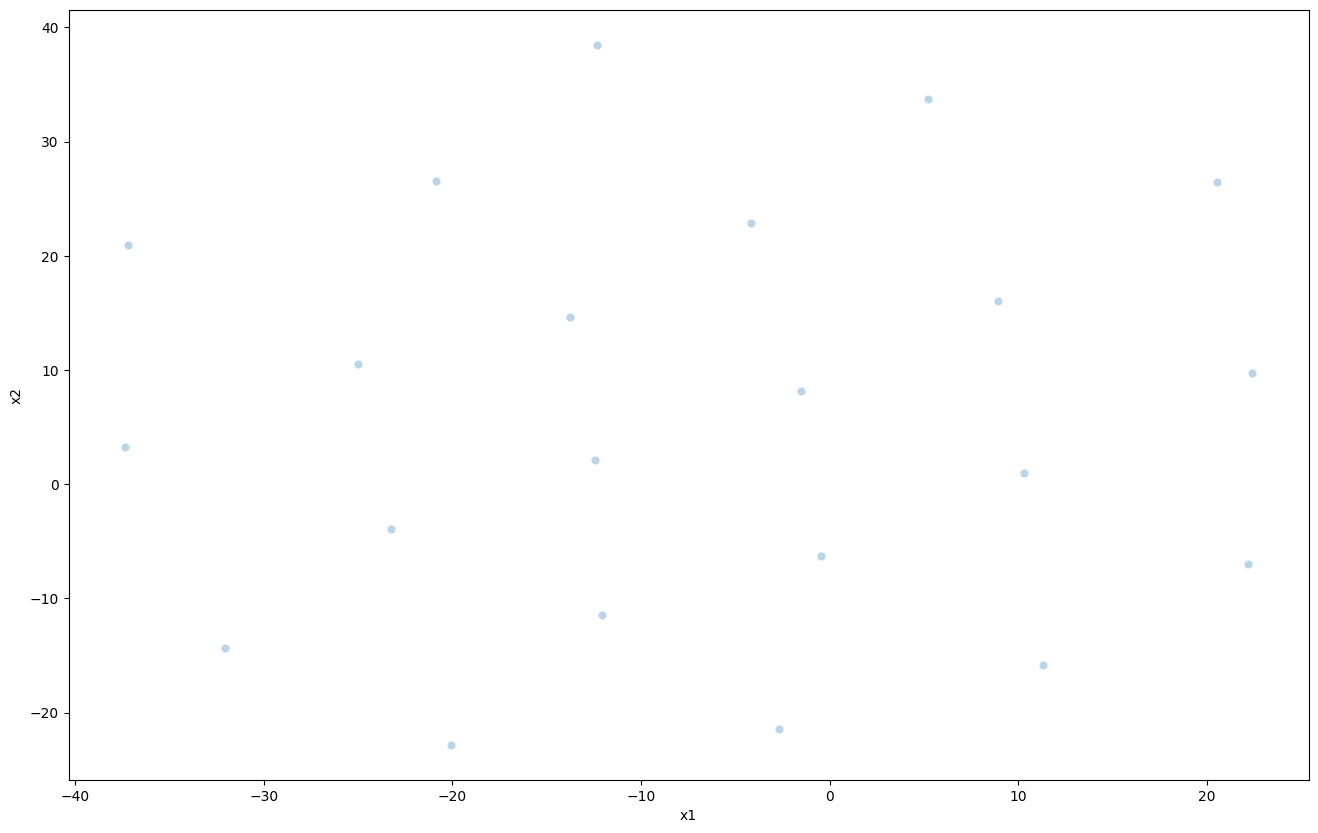

In [62]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x1", y="x2",
    # hue="y",
    # palette=sns.color_palette("hls", 10),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

In [42]:
knowledge_graph.connector.fetch("ASK WHERE { <http://dbpedia.org/resource/Belgium> ?p ?o . }")

{'head': {'link': []}, 'boolean': True}

In [35]:
import attr
from pyrdf2vec.connectors import SPARQLConnector
connector = attr.ib(
        init=False, default=None, type=SPARQLConnector, repr=False
    )

In [36]:
connector

_CountingAttr(counter=183, _default=None, repr=False, eq=True, order=True, hash=None, init=False, on_setattr=None, alias=None, metadata={})